In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from typing import Dict, Any

# Настройка визуализации
sns.set_theme(
    style="whitegrid",
    palette="pastel",
    font_scale=1.1,
    rc={"figure.figsize": (8, 5)}
)

## 1. Загрузка и предобработка данных

In [3]:
def load_data(filepath: str) -> pd.DataFrame:
    """Загрузка и первичная проверка данных"""
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
        print(f"✅ Данные успешно загружены. Наблюдений: {len(df)}")
        return df
    except Exception as e:
        raise RuntimeError(f"❌ Ошибка загрузки данных: {str(e)}")

In [4]:
# Загрузка данных
FILEPATH = 'results.csv'
df = load_data(FILEPATH)

# Первичный осмотр
display(df.head(3))
print("\nМетаданные:")
display(df.info())

✅ Данные успешно загружены. Наблюдений: 2373


,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен,Некорректный комментарий
0,2945792,5,спасибо,0,0,0,1,0,0
1,3234340,5,спасибо!,0,0,0,1,0,0
2,3380332,5,Отлично,0,1,0,1,0,0



Метаданные:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    2373 non-null   int64 
 1   rating                                2373 non-null   int64 
 2   comment                               2373 non-null   object
 3   Нравится скорость отработки заявок    2373 non-null   int64 
 4   Нравится качество выполнения заявки   2373 non-null   int64 
 5   Нравится качество работы сотрудников  2373 non-null   int64 
 6   Понравилось выполнение заявки         2373 non-null   int64 
 7   Вопрос решен                          2373 non-null   int64 
 8   Некорректный комментарий              2373 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 167.0+ KB


None

## 2. Предварительный анализ данных

In [5]:
def check_missing_data(df: pd.DataFrame) -> None:
    """Анализ пропущенных значений"""
    missing = df.isna().sum()
    if missing.any():
        plt.title('Распределение пропущенных значений')
        sns.heatmap(df.isnull(), cbar=False)
        plt.show()
        print("Внимание: обнаружены пропущенные значения!")
        display(missing[missing > 0])
    else:
        print("✅ Пропущенные значения отсутствуют")

In [6]:
check_missing_data(df)

✅ Пропущенные значения отсутствуют


## 3. Статистический анализ

In [7]:
def calculate_rating_stats(df: pd.DataFrame) -> Dict:
    """Расчет статистики по рейтингам"""
    stats = {
        'mean_rating': df['rating'].mean(),
        'median_rating': df['rating'].median(),
        'rating_distribution': df['rating'].value_counts().sort_index(),
        'rating_std': df['rating'].std()
    }
    return stats

In [8]:
def analyze_binary_features(df: pd.DataFrame) -> pd.DataFrame:
    """Анализ бинарных признаков"""
    features = df.columns[3:-1]  # Выбор бинарных признаков
    analysis = pd.DataFrame({
        'count': df[features].sum(),
        'percentage': df[features].mean() * 100
    }).sort_values('count', ascending=False)
    return analysis

In [9]:
def calculate_correlations(df: pd.DataFrame) -> pd.DataFrame:
    """Расчет корреляций между признаками"""
    corr_matrix = df.drop(columns=['id', 'comment']).corr()
    return corr_matrix

## 4. Визуализация результатов

In [10]:
def plot_rating_distribution(stats: Dict) -> None:
    """Визуализация распределения оценок"""
    plt.figure(figsize=(10, 6))
    stats['rating_distribution'].plot(kind='bar', color='teal')
    plt.title('Распределение оценок пользователей', pad=20)
    plt.xlabel('Оценка', labelpad=15)
    plt.ylabel('Количество отзывов', labelpad=15)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [11]:
def plot_binary_features(analysis: pd.DataFrame) -> None:
    """Визуализация бинарных признаков"""
    plt.figure(figsize=(12, 6))
    sns.barplot(x=analysis.index, y=analysis['percentage'], palette='viridis')
    plt.title('Распределение бинарных признаков (%)', pad=20)
    plt.ylim(0, 100)
    plt.ylabel('Процент положительных оценок', labelpad=15)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [12]:
def plot_correlation_matrix(corr_matrix: pd.DataFrame) -> None:
    """Визуализация матрицы корреляций"""
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask,
                linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Матрица корреляций Пирсона', pad=20)
    plt.tight_layout()
    plt.show()

## 5. Выполнение анализа

In [13]:
# Расчет статистик
rating_stats = calculate_rating_stats(df)
binary_analysis = analyze_binary_features(df)
correlations = calculate_correlations(df)

In [14]:
# Вывод ключевых метрик
print(f"\nСредняя оценка: {rating_stats['mean_rating']:.2f}")
print(f"Стандартное отклонение: {rating_stats['rating_std']:.2f}")
print("\nРаспределение оценок:")
display(rating_stats['rating_distribution'])

print("\nАнализ бинарных признаков:")
display(binary_analysis.style.background_gradient(cmap='Blues'))

print("\nКорреляционная матрица:")
display(correlations.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))


Средняя оценка: 4.95
Стандартное отклонение: 0.38

Распределение оценок:


,count
rating,
1,18
2,3
3,5
4,16
5,2331



Анализ бинарных признаков:


,count,percentage
Понравилось выполнение заявки,1857,78.255373
Нравится качество выполнения заявки,1473,62.073325
Нравится качество работы сотрудников,274,11.546566
Нравится скорость отработки заявок,256,10.788032
Вопрос решен,216,9.102402



Корреляционная матрица:


,rating,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен,Некорректный комментарий
rating,1.000000,-0.019407,0.037335,0.018487,0.071503,-0.062371,-0.083720
Нравится скорость отработки заявок,-0.019407,1.000000,0.179432,0.103885,-0.369911,-0.067541,-0.031390
Нравится качество выполнения заявки,0.037335,0.179432,1.000000,0.190016,-0.138331,-0.136110,-0.161334
Нравится качество работы сотрудников,0.018487,0.103885,0.190016,1.000000,-0.490418,-0.063907,-0.052463
Понравилось выполнение заявки,0.071503,-0.369911,-0.138331,-0.490418,1.000000,-0.351713,-0.261094
Вопрос решен,-0.062371,-0.067541,-0.136110,-0.063907,-0.351713,1.000000,0.005561
Некорректный комментарий,-0.083720,-0.031390,-0.161334,-0.052463,-0.261094,0.005561,1.000000


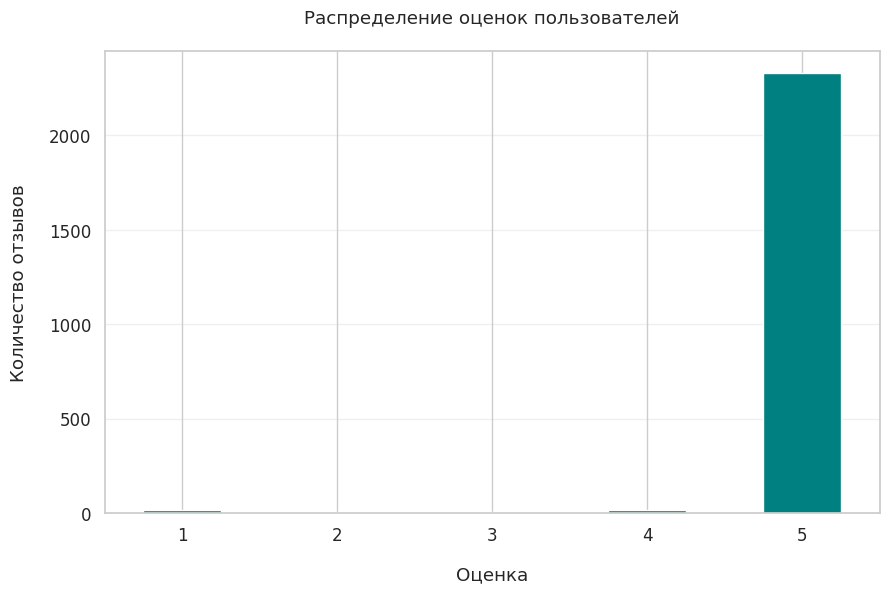

<ipython-input-11-b8cd7eabf065>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=analysis.index, y=analysis['percentage'], palette='viridis')


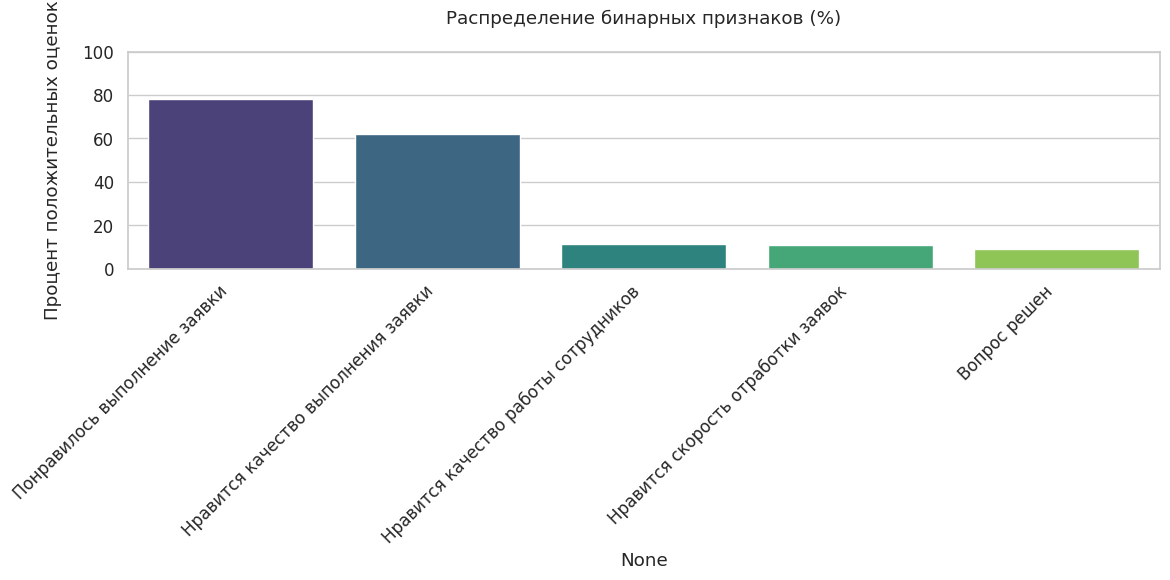

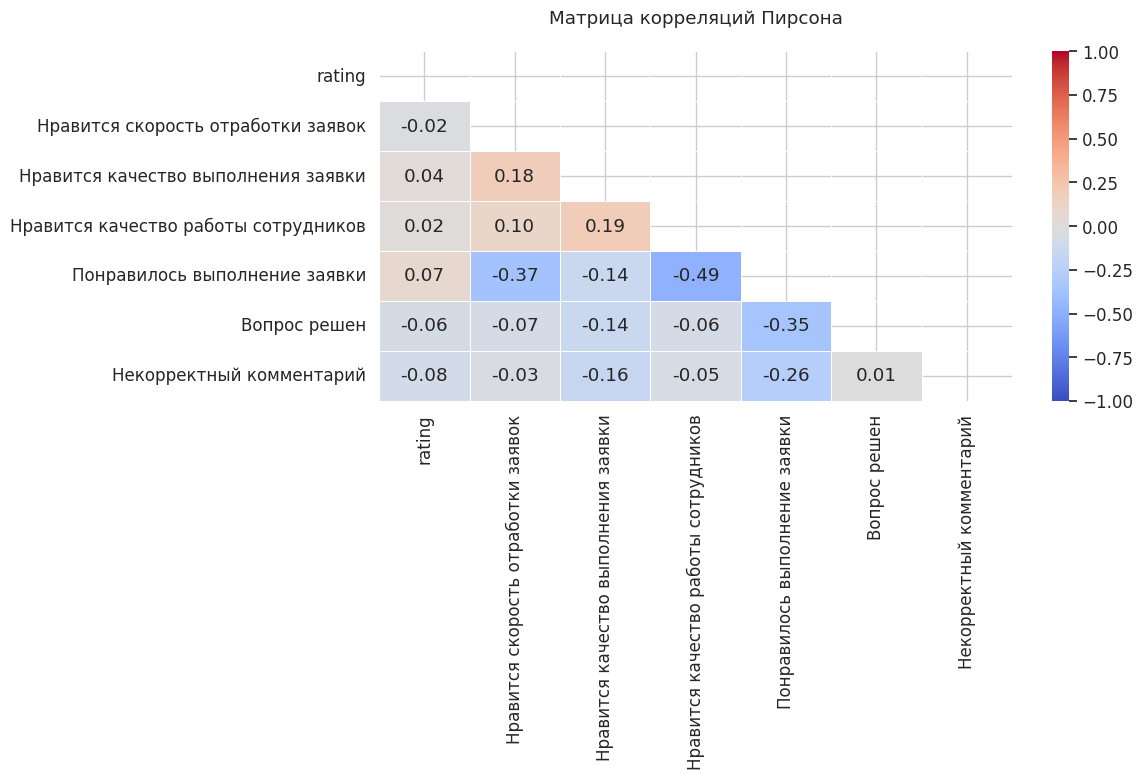

In [15]:
# Генерация графиков
plot_rating_distribution(rating_stats)
plot_binary_features(binary_analysis)
plot_correlation_matrix(correlations)